# Introduction #

In the previous lesson we looked at our first model-based method for feature engineering: clustering. In this lesson we look at our next: principal component analysis (PCA). Just like clustering is a partitioning of the dataset based on proximity, you could think of PCA as a partitioning of the variation in the data. PCA is a great tool to help you discover important relationships in the data and can also be used to create more informative features.

*В предишния урок разгледахме нашия първи базиран на модел метод за проектиране на характеристики: групиране-(clustering) . В този урок разглеждаме нашия следващ: **анализ на главните компоненти** (*__PCA__*). Точно както клъстерирането е разделяне на множежството от данни въз основа на близостта, можете да мислите за PCA като разделяне на вариацията в данните. PCA е чудесен инструмент, който ви помага да откриете важни връзки в данните и може да се използва и за създаване на по-информативни характеристики.*

(**Technical note**: PCA is typically applied to [standardized](https://www.kaggle.com/alexisbcook/scaling-and-normalization) data. With standardized data "variation" means "correlation". With *unstandardized* data "variation" means "covariance". All data in this course will be standardized before applying PCA.)

*(**Техническа бележка**: PCA обикновено се прилага към [стандартизирани](https://www.kaggle.com/alexisbcook/scaling-and-normalization) данни. При стандартизирани данни „вариация“ означава „корелация“. С * нестандартизирани* данни "вариация" означава "ковариация".Всички данни в този курс ще бъдат стандартизирани преди прилагането на PCA.*

# Principal Component Analysis #

In the [*Abalone*](https://www.kaggle.com/rodolfomendes/abalone-dataset) dataset are physical measurements taken from several thousand Tasmanian abalone. (An abalone is a sea creature much like a clam or an oyster.) We'll just look at a couple features for now: the `'Height'` and `'Diameter'` of their shells.

*В набора от данни [*Abalone*](https://www.kaggle.com/rodolfomendes/abalone-dataset) са физически измервания, направени от няколко хиляди тасманийски морски ухила. (Охото е морско създание, подобно на мида или стрида.) Засега ще разгледаме само няколко характеристики: „Височината“ и „Диаметърът“ на техните черупки.*

You could imagine that within this data are "axes of variation" that describe the ways the abalone tend to differ from one another. Pictorially, these axes appear as perpendicular lines running along the natural dimensions of the data, one axis for each original feature.

*Бихте могли да си представите, че в рамките на тези данни има „оси на вариация“, които описват начините, по които охлювите се различават един от друг. Нагледно тези оси изглеждат като перпендикулярни линии, минаващи по естествените размери на данните, по една ос за всяка оригинална характеристика.*

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/rr8NCDy.png" width=300, alt="">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

Often, we can give names to these axes of variation. The longer axis we might call the "Size" component: small height and small diameter (lower left) contrasted with large height and large diameter (upper right). The shorter axis we might call the "Shape" component: small height and large diameter (flat shape) contrasted with large height and small diameter (round shape).

*Често можем да дадем имена на тези оси на вариация. По-дългата ос бихме могли да наречем компонент "Размер": малка височина и малък диаметър (долу вляво) в контраст с голяма височина и голям диаметър (горе вдясно). По-късата ос бихме могли да наречем компонент "Форма": малка височина и голям диаметър (плоска форма) в контраст с голяма височина и малък диаметър (кръгла форма).*

Notice that instead of describing abalones by their `'Height'` and `'Diameter'`, we could just as well describe them by their `'Size'` and `'Shape'`. This, in fact, is the whole idea of PCA: instead of describing the data with the original features, we describe it with its axes of variation. The axes of variation become the new features.

*Забележете, че вместо да описваме морските охлюви чрез техните `„Височина“` и `„Диаметър“`, можем също така да ги опишем чрез техните `„Размер“` и `„Форма“`. Това всъщност е цялата идея на PCA: вместо да описваме данните с оригиналните характеристики, ние ги описваме с техните оси на вариация. Осите на вариация се превръщат в новите характеристики.*

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/XQlRD1q.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center>The principal components become the new features by a rotation of the dataset in the feature space.
</center></figcaption>
</figure>

The new features PCA constructs are actually just linear combinations (weighted sums) of the original features:

```
df["Size"] = 0.707 * X["Height"] + 0.707 * X["Diameter"]
df["Shape"] = 0.707 * X["Height"] - 0.707 * X["Diameter"]
```

These new features are called the **principal components** of the data. The weights themselves are called **loadings**. There will be as many principal components as there are features in the original dataset: if we had used ten features instead of two, we would have ended up with ten components.


Тези нови функции се наричат ​​**основни компоненти** на данните. Самите тегла се наричат ​​**зареждания**. Ще има толкова основни компоненти, колкото има характеристики в оригиналния набор от данни: ако бяхме използвали десет функции вместо две, щяхме да имаме десет компонента.


Зарежданията на даден компонент ни казват, каква вариация изразява чрез знаk(+/-) и величини:

A component's loadings tell us what variation it expresses through signs(+/-) and magnitudes:

| Features \ Components | Size (PC1) | Shape (PC2) |
|-----------------------|------------|-------------|
| Height                | 0.707      | 0.707       |
| Diameter              | 0.707      | -0.707      |

This table of loadings is telling us that in the `Size` component, `Height` and `Diameter` vary in the same direction (same sign), but in the `Shape` component they vary in opposite directions (opposite sign). In each component, the loadings are all of the same magnitude and so the features contribute equally in both.

PCA also tells us the *amount* of variation in each component. We can see from the figures that there is more variation in the data along the `Size` component than along the `Shape` component. PCA makes this precise through each component's **percent of explained variance**.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/xWTvqDA.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center> "Size" accounts for about 96% and the "Shape" for about 4% of the variance between Height and Diameter.
</center></figcaption>
</figure>

The `Size` component captures the majority of the variation between `Height` and `Diameter`. It's important to remember, however, that the amount of variance in a component doesn't necessarily correspond to how good it is as a predictor: it depends on what you're trying to predict.

*Компонентът „Размер“ улавя по-голямата част от вариациите между „Височина“ и „Диаметър“. Важно е обаче да запомните, че размерът на вариация в даден компонент не съответства непременно на това колко добър е той като предиктор: зависи от това, което се опитвате да предвидите.*

# PCA for Feature Engineering #

There are two ways you could use PCA for feature engineering.

The **_first way_** is to use it as a descriptive technique. Since the components tell you about the variation, you could compute the MI scores for the components and see what kind of variation is most predictive of your target. That could give you ideas for kinds of features to create -- a product of `'Height'` and `'Diameter'` if `'Size'` is important, say, or a ratio of `'Height'` and `'Diameter'` if `Shape` is important. You could even try clustering on one or more of the high-scoring components.

*Първият начин е да го използвате като описателна техника. Тъй като компонентите ви казват за вариантността, можете да изчислите MI резултатите на компонентите и да видите какъв вид вариантност е най-предсказуема за вашата цел. Това може да ви даде идеи за видове функции, които да създадете - произведение на `'Височина'` и `'Диаметър'`, ако `"Размерът"` е важен, да речем, или съотношение на `'Височина'` и `'Диаметър'`, ако `„Формата“` е важна. Можете дори да опитате групиране на един или повече от компонентите с висок резултат.*

The __second way__ is to use the components themselves as features. Because the components expose the variational structure of the data directly, they can often be more informative than the original features. Here are some use-cases:

*Вторият начин е да използвате самите компоненти като характеристики. Тъй като компонентите излагат директно вариантностната структура на данните, те често могат да бъдат по-информативни от оригиналните характеристики. Ето някои случаи на употреба:*

- **Dimensionality reduction**: When your features are highly redundant (*multicollinear*, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information. *Когато вашите характеристики са силно разнообразни (*мултиколинеарни*, по-специално), PCA ще отдели излишъка в един или повече компоненти с почти нулева дисперсия, които след това можете да премахнете, тъй като те ще съдържат малко или никаква информация.*

- **Anomaly detection**: Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.*Необичайна вариантност, която не е очевидна от оригиналните характеристики, често се появява в компонентите с ниска вариантност. Тези компоненти могат да бъдат много информативни при задача за откриване на аномалия или извънредни стойности.*
- **Noise reduction**: A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.*Колекция от показания на сензори често споделя общ фонов шум. PCA понякога може да събира (информативния) сигнал в по-малък брой функции, като оставя шума сам, като по този начин повишава съотношението сигнал/шум.*
- **Decorrelation**: Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.*Някои ML алгоритми се борят с високо корелирани характеристики. PCA трансформира корелирани характеристики в некорелирани компоненти, с които алгоритъмът ви може да работи по-лесно.*

PCA basically gives you direct access to the correlational structure of your data. You'll no doubt come up with applications of your own!*PCA принцино ви дава директен достъп до корелационната структура на вашите данни. Без съмнение ще измислите свои собствени приложения!*

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>PCA Best Practices</strong><br>
There are a few things to keep in mind when applying PCA:
<ul>
<li> PCA only works with numeric features, like continuous quantities or counts.
<li> PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
<li> Consider removing or constraining outliers, since they can have an undue influence on the results.
</ul>
</blockquote>

# Example - 1985 Automobiles #

In this example, we'll return to our [*Automobile*](https://www.kaggle.com/toramky/automobile-dataset) dataset and apply PCA, using it as a descriptive technique to discover features. We'll look at other use-cases in the exercise.

This hidden cell loads the data and defines the functions `plot_variance` and `make_mi_scores`.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    '''Compute the Mutual Information of the features
        and trnsform the values as a sorted Serie'''
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = pd.read_csv("../input/fe-course-data/autos.csv")

/tmp/ipykernel_32/2827894042.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


We've selected four features that cover a range of properties. Each of these features also has a high MI score with the target, `price`. We'll standardize the data since these features aren't naturally on the same scale.

*Избрахме четири характеристики, които покриват набор от свойства. Всяка от тези характеристики също има висок резултат на MI с целта „цена“. Ще стандартизираме данните, тъй като тези характеристики не са естествено в еднакъв мащаб.*

In [2]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,4,130,mpfi,3.47,2.68,9,111,5000,21,27
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,4,130,mpfi,3.47,2.68,9,111,5000,21,27
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,6,152,mpfi,2.68,3.47,9,154,5000,19,26
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,4,109,mpfi,3.19,3.40,10,102,5500,24,30
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,5,136,mpfi,3.19,3.40,8,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,4,141,mpfi,3.78,3.15,9,114,5400,23,28
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,4,141,mpfi,3.78,3.15,8,160,5300,19,25
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,6,173,mpfi,3.58,2.87,8,134,5500,18,23
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,6,145,idi,3.01,3.40,23,106,4800,26,27


In [9]:
X = X.loc[:, features]
# My
X, X.std(axis=0), X.mean(axis=0)

(     highway_mpg  engine_size  horsepower  curb_weight
 0             27          130         111         2548
 1             27          130         111         2548
 2             26          152         154         2823
 3             30          109         102         2337
 4             22          136         115         2824
 ..           ...          ...         ...          ...
 188           28          141         114         2952
 189           25          141         160         3049
 190           23          173         134         3012
 191           27          145         106         3217
 192           25          141         114         3062
 
 [193 rows x 4 columns],
 highway_mpg      6.816910
 engine_size     41.590452
 horsepower      37.960107
 curb_weight    526.700026
 dtype: float64,
 highway_mpg      30.787565
 engine_size     128.124352
 horsepower      103.481865
 curb_weight    2561.507772
 dtype: float64)

In [11]:
# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled

,highway_mpg,engine_size,horsepower,curb_weight
0,-0.555613,0.045098,0.198054,-0.025646
1,-0.555613,0.045098,0.198054,-0.025646
2,-0.702307,0.574066,1.330822,0.496473
3,-0.115531,-0.459826,-0.039037,-0.426254
4,-1.289083,0.189362,0.303427,0.498371
...,...,...,...,...
188,-0.408919,0.309582,0.277084,0.741394
189,-0.849001,0.309582,1.488882,0.925560
190,-1.142389,1.078989,0.803953,0.855311
191,-0.555613,0.405758,0.066336,1.244527


Now we can fit scikit-learn's `PCA` estimator and create the principal components. You can see here the first few rows of the transformed dataset.

In [12]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [14]:
# My
X_pca.sum(axis = 0), X_pca.sum(axis = 1)

(PC1   -4.218847e-15
 PC2   -4.440892e-15
 PC3   -7.993606e-15
 PC4   -1.776357e-15
 dtype: float64,
 0      0.275925
 1      0.275925
 2      1.785995
 3     -0.577551
 4      0.339437
          ...   
 188    0.342933
 189    1.204214
 190    2.066660
 191    0.058698
 192    0.242388
 Length: 193, dtype: float64)

In [17]:
pca.components_

array([[-0.4923469 ,  0.50385865,  0.50044809,  0.50326205],
       [ 0.77089183,  0.62670948,  0.01378838,  0.11300841],
       [ 0.07014167,  0.01996004,  0.73109336, -0.67836881],
       [-0.39799556,  0.59410713, -0.46353435, -0.52323242]])

After fitting, the `PCA` instance contains the loadings in its `components_` attribute. (Terminology for PCA is inconsistent, unfortunately. We're following the convention that calls the transformed columns in `X_pca` the *components*, which otherwise don't have a name.) We'll wrap the loadings up in a dataframe.

*After fitting, PCA съдържа зарежданията в своя атрибут `components_`. (Терминологията за PCA е непоследователна, за съжаление. Ние следваме конвенцията, която нарича трансформираните колони в X_pca `компонентите`, които иначе нямат име.)Ще увием зарежданията в рамка с данни(pd.DataFrame).*

In [18]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


Recall that the signs and magnitudes of a component's loadings tell us what kind of variation it's captured. The first component (`PC1`) shows a contrast between large, powerful vehicles with poor gas milage, and smaller, more economical vehicles with good gas milage. We might call this the "Luxury/Economy" axis. The next figure shows that our four chosen features mostly vary along the Luxury/Economy axis.

In [19]:
pca.explained_variance_ratio_

array([0.85411424, 0.06648926, 0.05949457, 0.01990192])

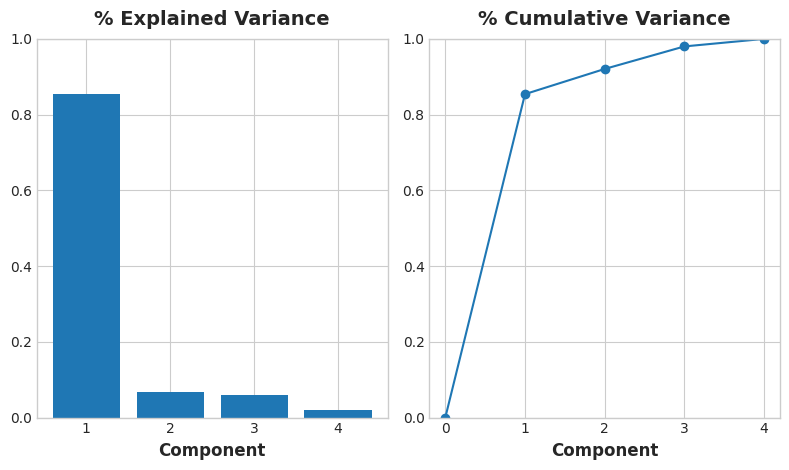

In [20]:
# Look at explained variance
plot_variance(pca);

Let's also look at the MI scores of the components. Not surprisingly, `PC1` is highly informative, though the remaining components, despite their small variance, still have a significant relationship with `price`. Examining those components could be worthwhile(си заслужава) to find relationships not captured by the main Luxury/Economy axis.


*Нека също да разгледаме резултатите от MI на компонентите. Не е изненадващо, че PC1 е много информативен, въпреки че останалите компоненти, въпреки малката им вариация, все още имат значителна връзка с `цената`. Проучването на тези компоненти може да си струва да се намерят връзки, които не са уловени от основната ос _Лукс/Икономичен_.*

In [21]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.012982
PC2    0.378915
PC3    0.306621
PC4    0.204729
Name: MI Scores, dtype: float64

The third component shows a contrast between `horsepower` and `curb_weight` -- sports cars vs. wagons, it seems.

*Третият компонент изглежда, че показва контраст между `конски сили` и `собствено тегло` - спортни коли срещу комби.*

In [23]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols], idx

(              make   body_style  horsepower  curb_weight
 118        porsche      hardtop         207         2756
 117        porsche      hardtop         207         2756
 119        porsche  convertible         207         2800
 45          jaguar        sedan         262         3950
 96          nissan    hatchback         200         3139
 ..             ...          ...         ...          ...
 59   mercedes-benz        wagon         123         3750
 61   mercedes-benz        sedan         123         3770
 101         peugot        wagon          95         3430
 105         peugot        wagon          95         3485
 143         toyota        wagon          62         3110
 
 [193 rows x 4 columns],
 Index([118, 117, 119,  45,  96,  66, 124, 125,  14,   2,
        ...
         99, 107, 103, 100, 104,  59,  61, 101, 105, 143],
       dtype='int64', length=193))

To express this contrast, let's create a new ratio feature:

*Създаваме нова характеристика чрез съотношение `собствено тегло`/`конски сили`, за да изразим този контраст*

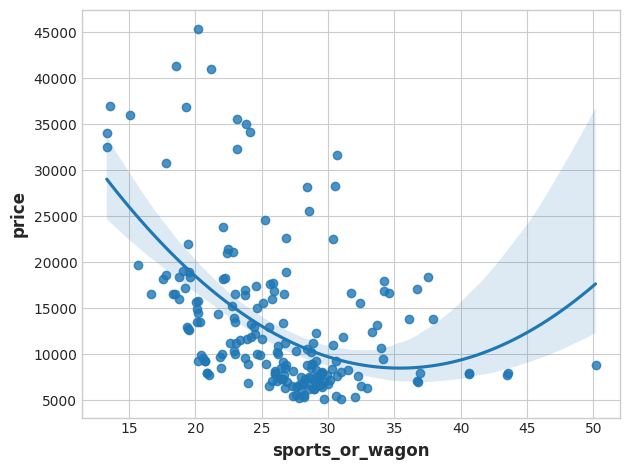

In [24]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

# Your Turn #

[**Improve your feature set**](https://www.kaggle.com/kernels/fork/14393921) by decomposing the variation in *Ames Housing* and use principal components to detect outliers.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*